# data cleaning

#### imports and misc

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
def set_color(_fig, _ax):
    _fig.patch.set_facecolor('#1b212c')
    _ax.patch.set_facecolor('#1b212c')
    _ax.spines['bottom'].set_color('white')
    _ax.spines['top'].set_color('white')
    _ax.spines['left'].set_color('white')
    _ax.spines['right'].set_color('white')
    _ax.xaxis.label.set_color('white')
    _ax.yaxis.label.set_color('white')
    _ax.grid(alpha=0.1)
    _ax.title.set_color('white')
    _ax.tick_params(axis='x', colors='white')
    _ax.tick_params(axis='y', colors='white')


counter = 0

def matrix(_cars):
    global counter
    fig, ax = plt.subplots(figsize=(25, 10), dpi=300)
    set_color(fig, ax)
    msno.matrix(_cars, ax=ax)
    plt.tight_layout()
    plt.savefig(f"../images/matrix/{counter}.png", dpi=300)
    counter += 1

In [3]:
cars = pd.read_csv('../resources/cars.csv', low_memory=False)

In [4]:
for index, row in cars.iterrows():
    if 'land rover' in row['title'].lower():
        cars.loc[index, 'manufacturer'] = 'land rover'

### drop unnecessary columns and show matrix

In [5]:
cars.drop(['features', 'scraped_on', 'parking_assistant', 'origin', 'hu', "environment_class", "doors", "num_seats"], axis=1, inplace=True)

c:\users\morie\appdata\local\programs\python\python38\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


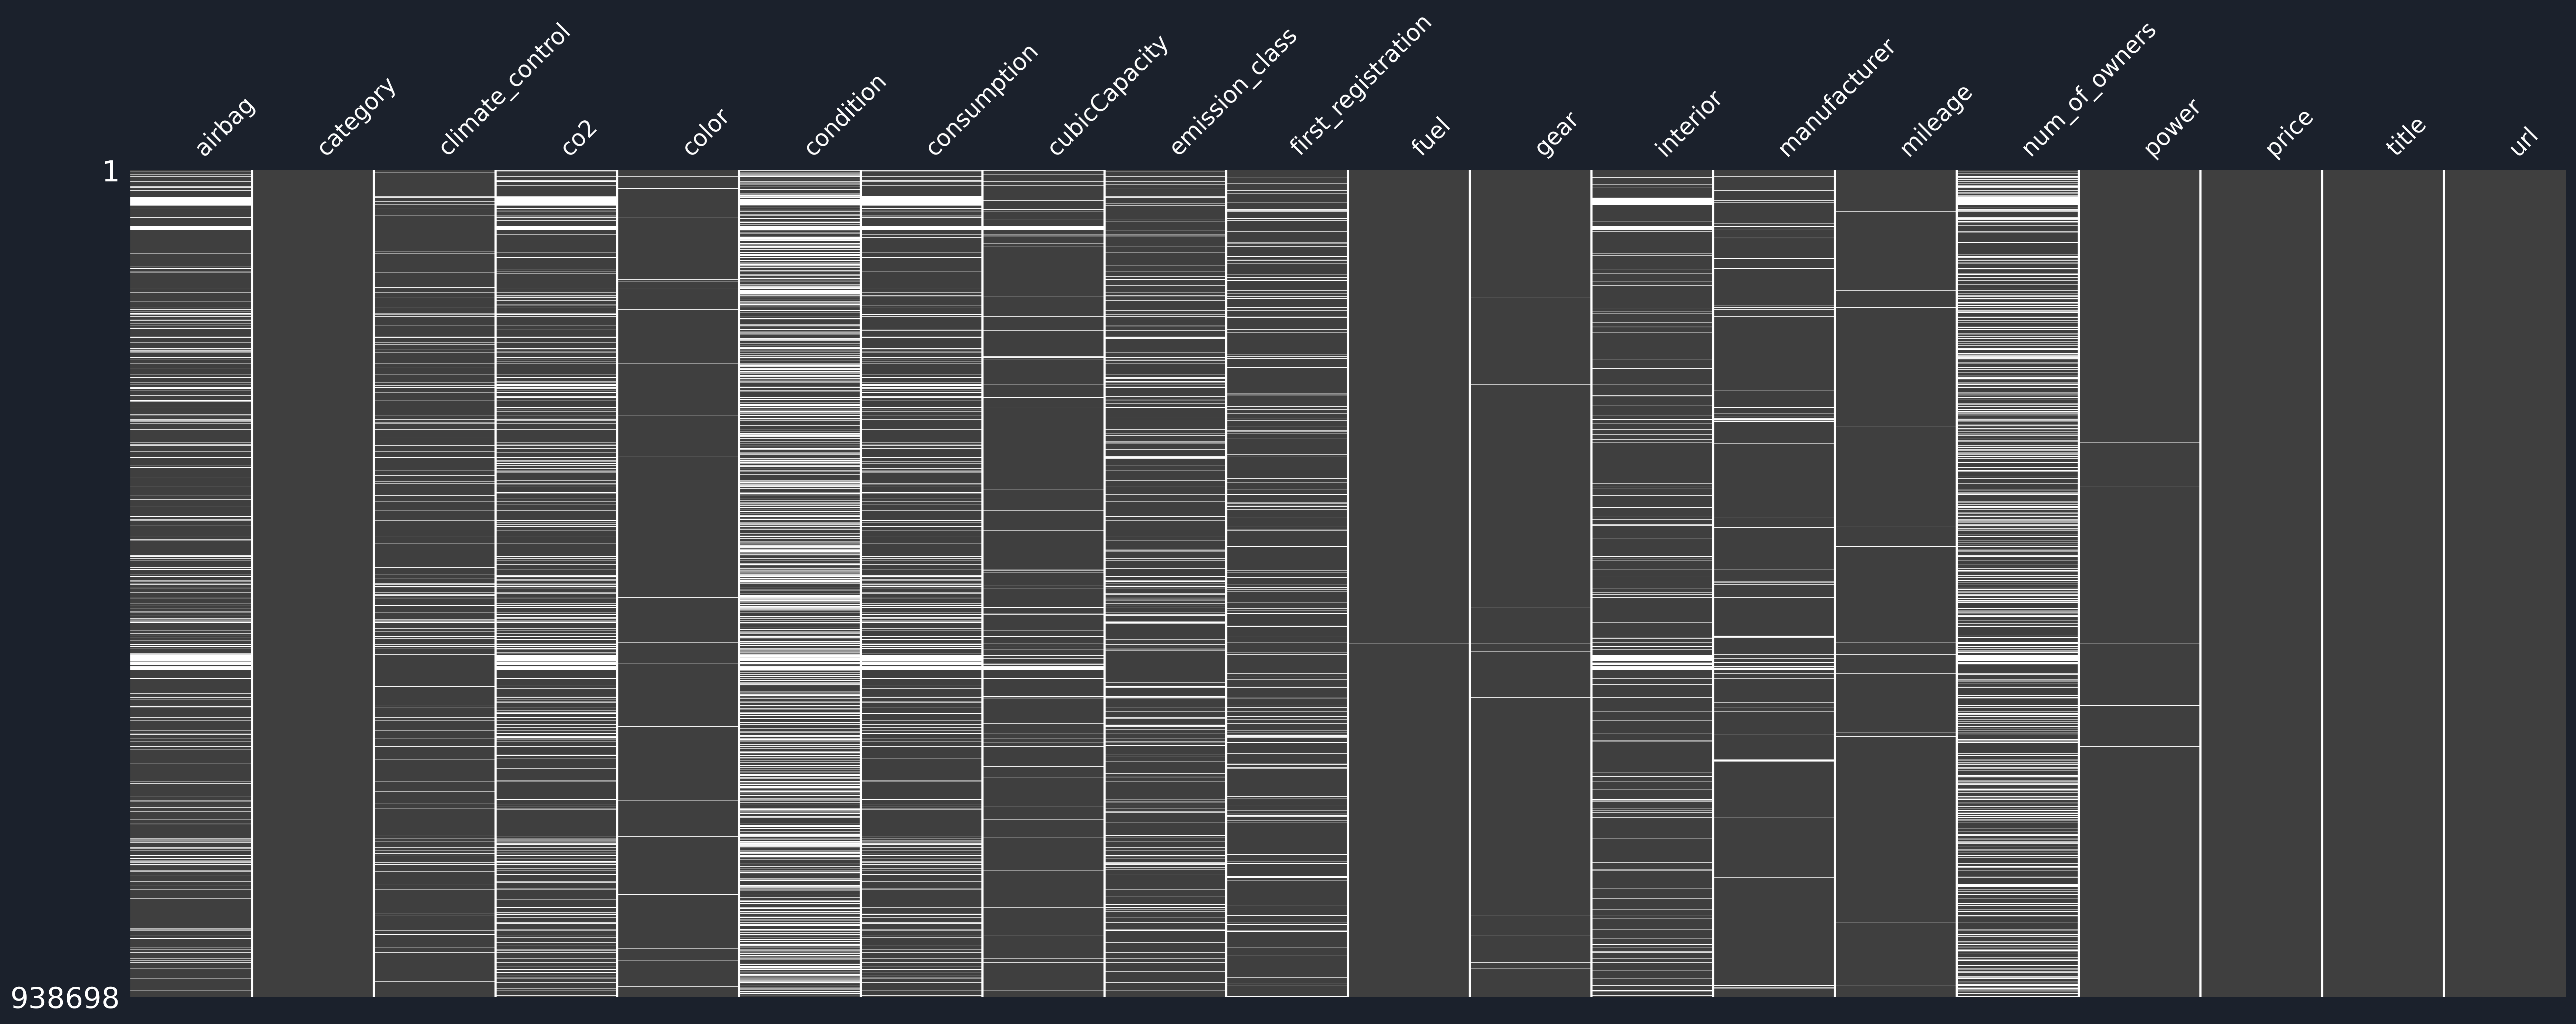

In [6]:
matrix(cars)

## fix up user data

#### Number of owners

In [8]:
cars['num_of_owners'] = cars['num_of_owners'].fillna(1)
cars = cars[cars.num_of_owners != "num_of_owners"]
cars = cars.astype({"num_of_owners": "float"})
cars = cars.astype({"num_of_owners": "int"})
cars = cars[cars['num_of_owners'] <= 20]

#### airbag

c:\users\morie\appdata\local\programs\python\python38\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


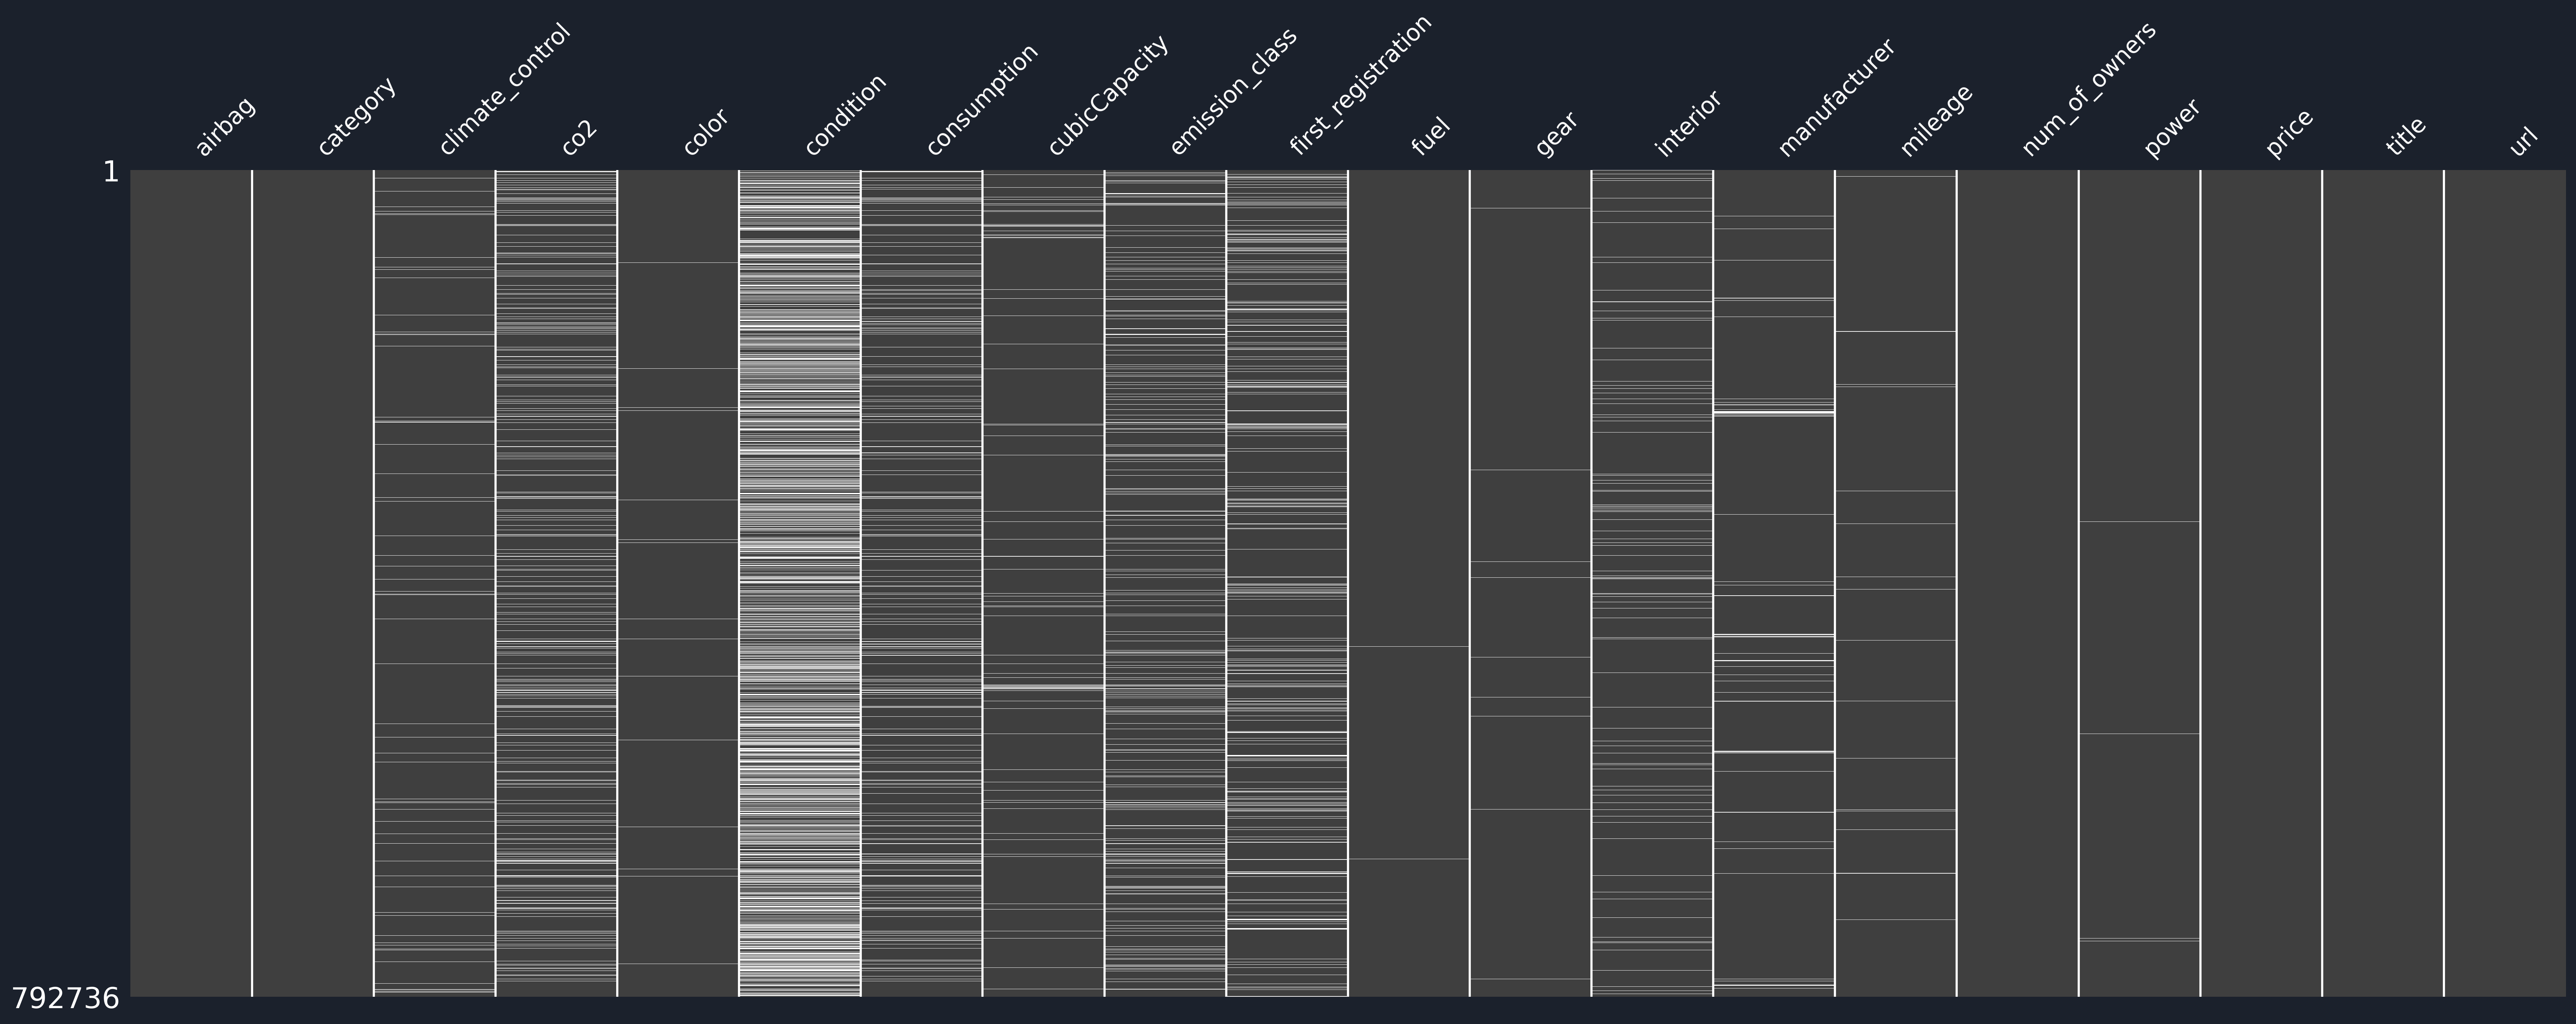

In [9]:
cars = cars[cars['airbag'].notnull()]
cars['airbag'] = cars['airbag'].replace('front airbags', 'front-airbags')
cars['airbag'] = cars['airbag'].replace('driver airbag', 'fahrer-airbag')
cars['airbag'] = cars['airbag'].replace('front and side airbags', 'front- und seiten-airbags')
cars['airbag'] = cars['airbag'].replace('front and side and more airbags', 'front-, seiten- und weitere airbags')

matrix(cars)

#### climate_control

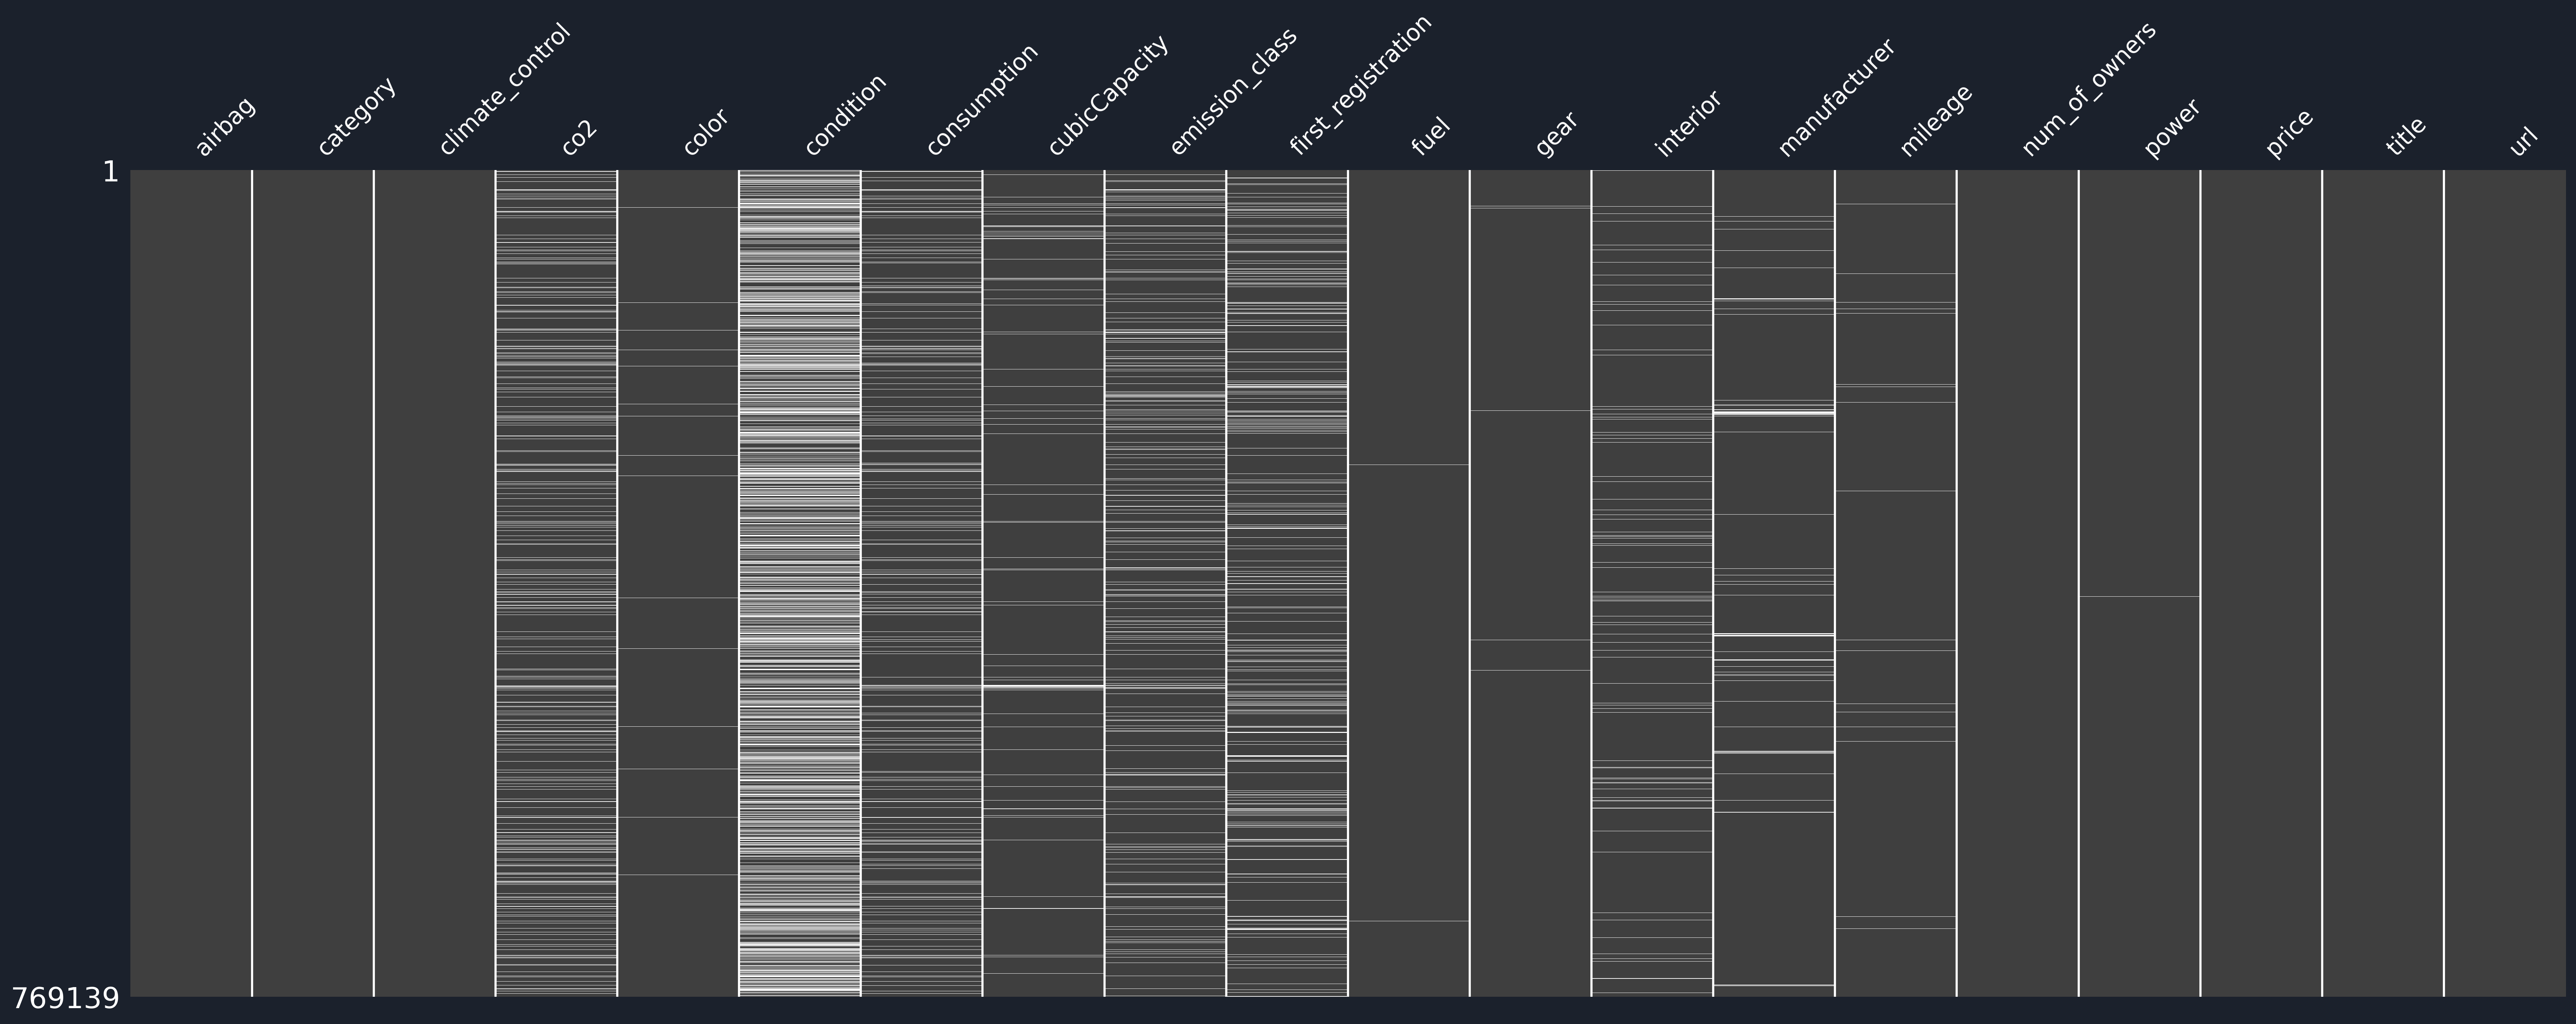

In [10]:
cars = cars[cars['climate_control'].notnull()]
cars['climate_control'] = cars['climate_control'].replace('a/c (man.)', 'klimaanlage')
cars['climate_control'] = cars['climate_control'].replace('no climatisation', 'keine klimaanlage oder -automatik')
cars['climate_control'] = cars['climate_control'].replace('automatic air conditioning', 'klimaautomatik')
cars['climate_control'] = cars['climate_control'].replace('automatic climatisation, 2 zones', '2-zonen-klimaautomatik')
cars['climate_control'] = cars['climate_control'].replace('automatic climatisation, 3 zones', '3-zonen-klimaautomatik')

matrix(cars)

#### color

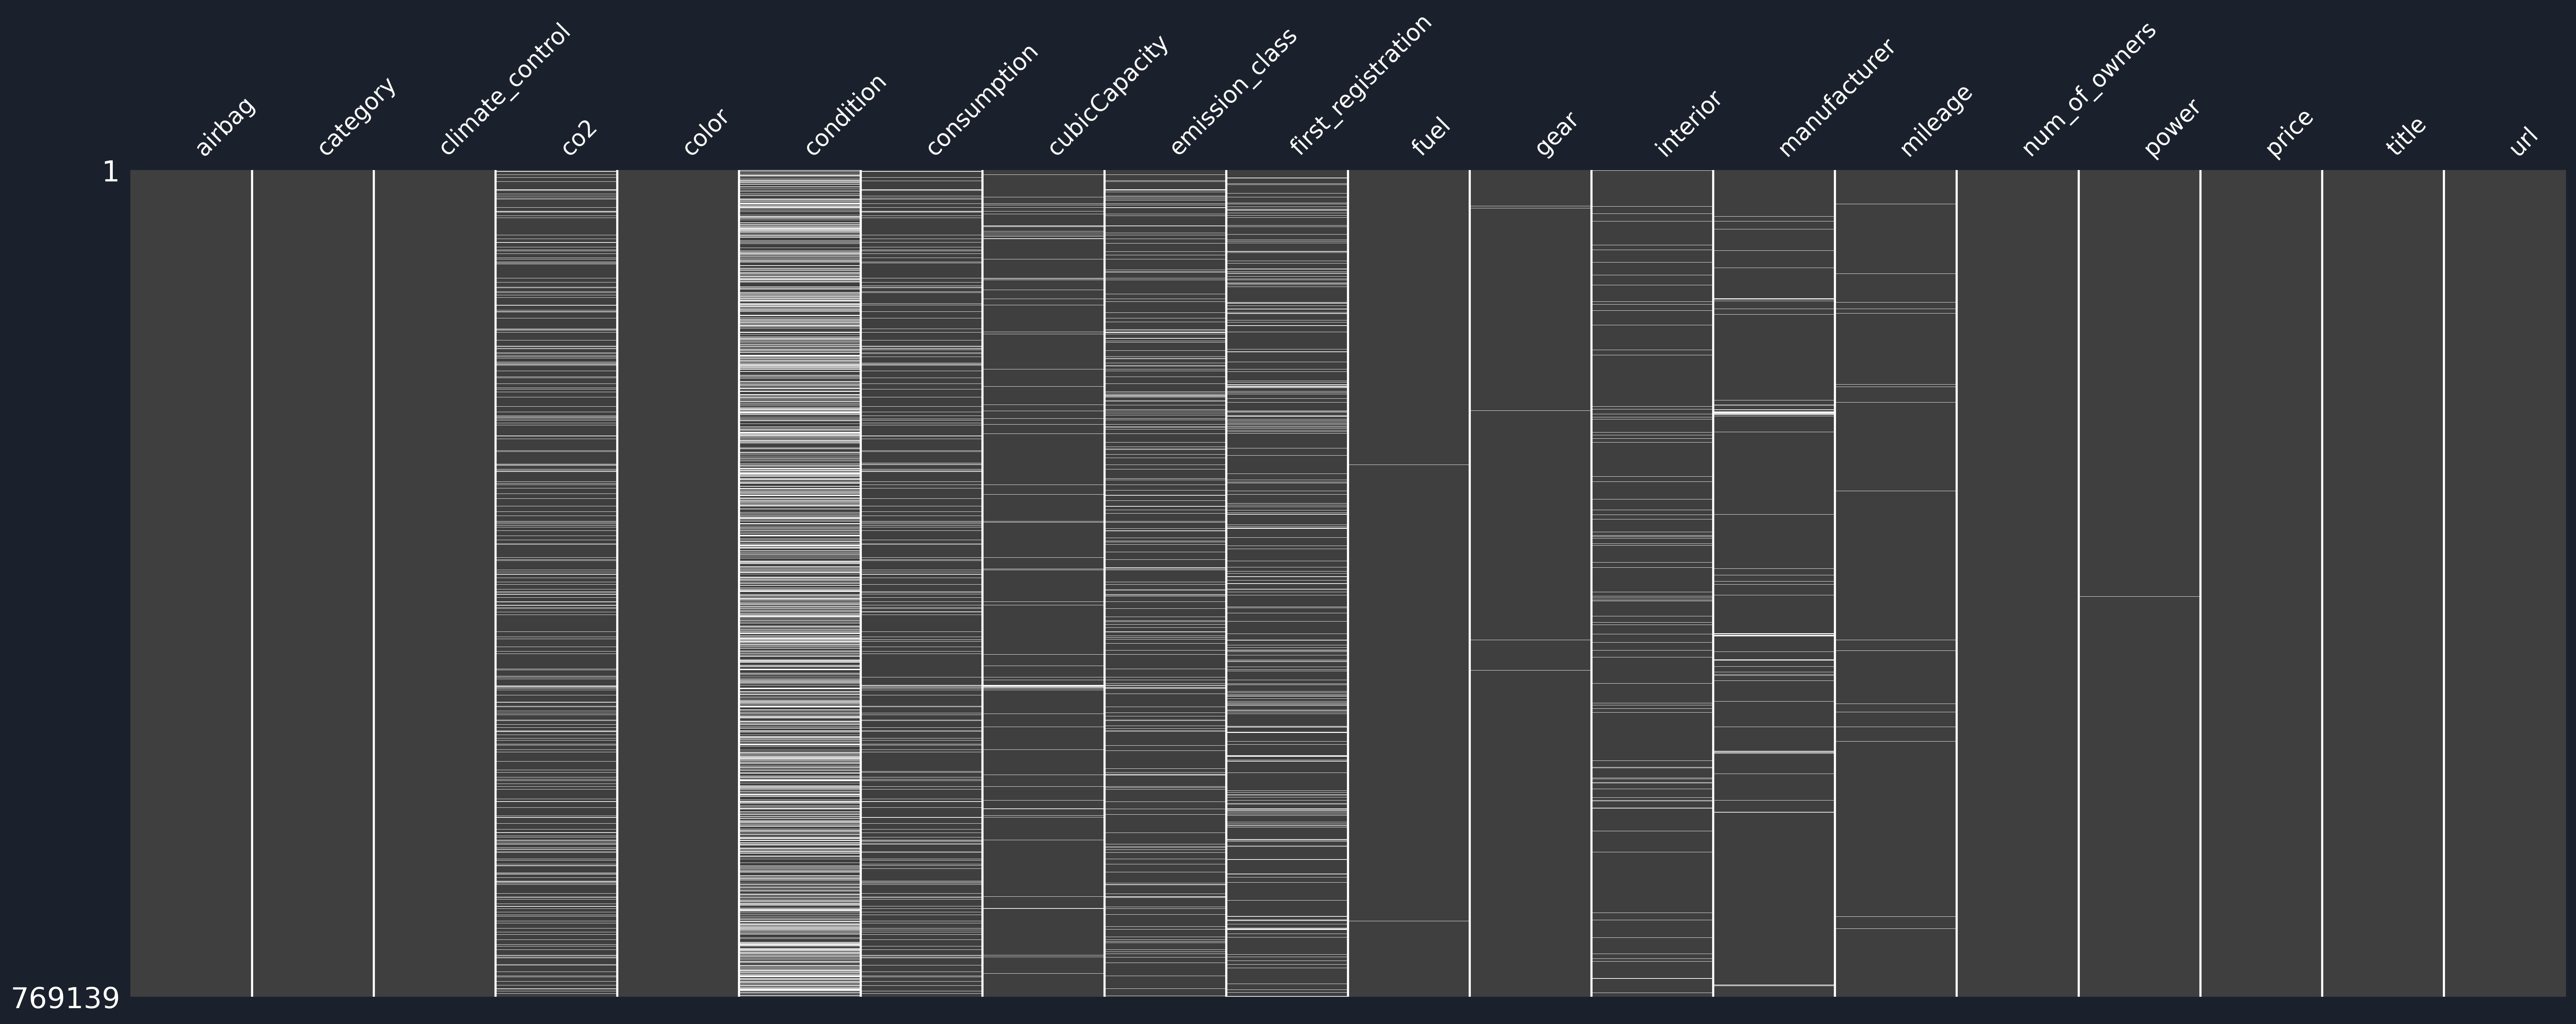

In [11]:
cars['color'] = cars['color'].fillna('andere')

for color in ["rot", "lila", "gelb", "blau", "schwarz", "weiß", "grau", "braun", "orange", "pink", "violett", "grau", "pink", "violett", "silber", "gold", "beige", "grün"]:
    cars['color'] = cars['color'].apply(lambda x: color if color in x.lower() else x)

color_dict = {"red": "rot", "blue": "blau", "black": "schwarz", "white": "weiß", "grey": "grau", "brown": "braun",
              "orange": "orange", "pink": "pink", "violet": "violett", "silver": "silber", "gold": "gold",
              "beige": "beige", "green": "grün", "weiss": "weiß", "grün": "grün", "yellow": "gelb", "purple":"violett",
              "lila": "violett"}

for key in color_dict:
    cars['color'] = cars['color'].apply(lambda x: color_dict[key] if key in x.lower() else x)

color_amt_dict = cars['color'].value_counts().to_dict()
cars['color'] = cars['color'].apply(lambda x: 'andere' if color_amt_dict[x] < 250 else x)

matrix(cars)

#### condition

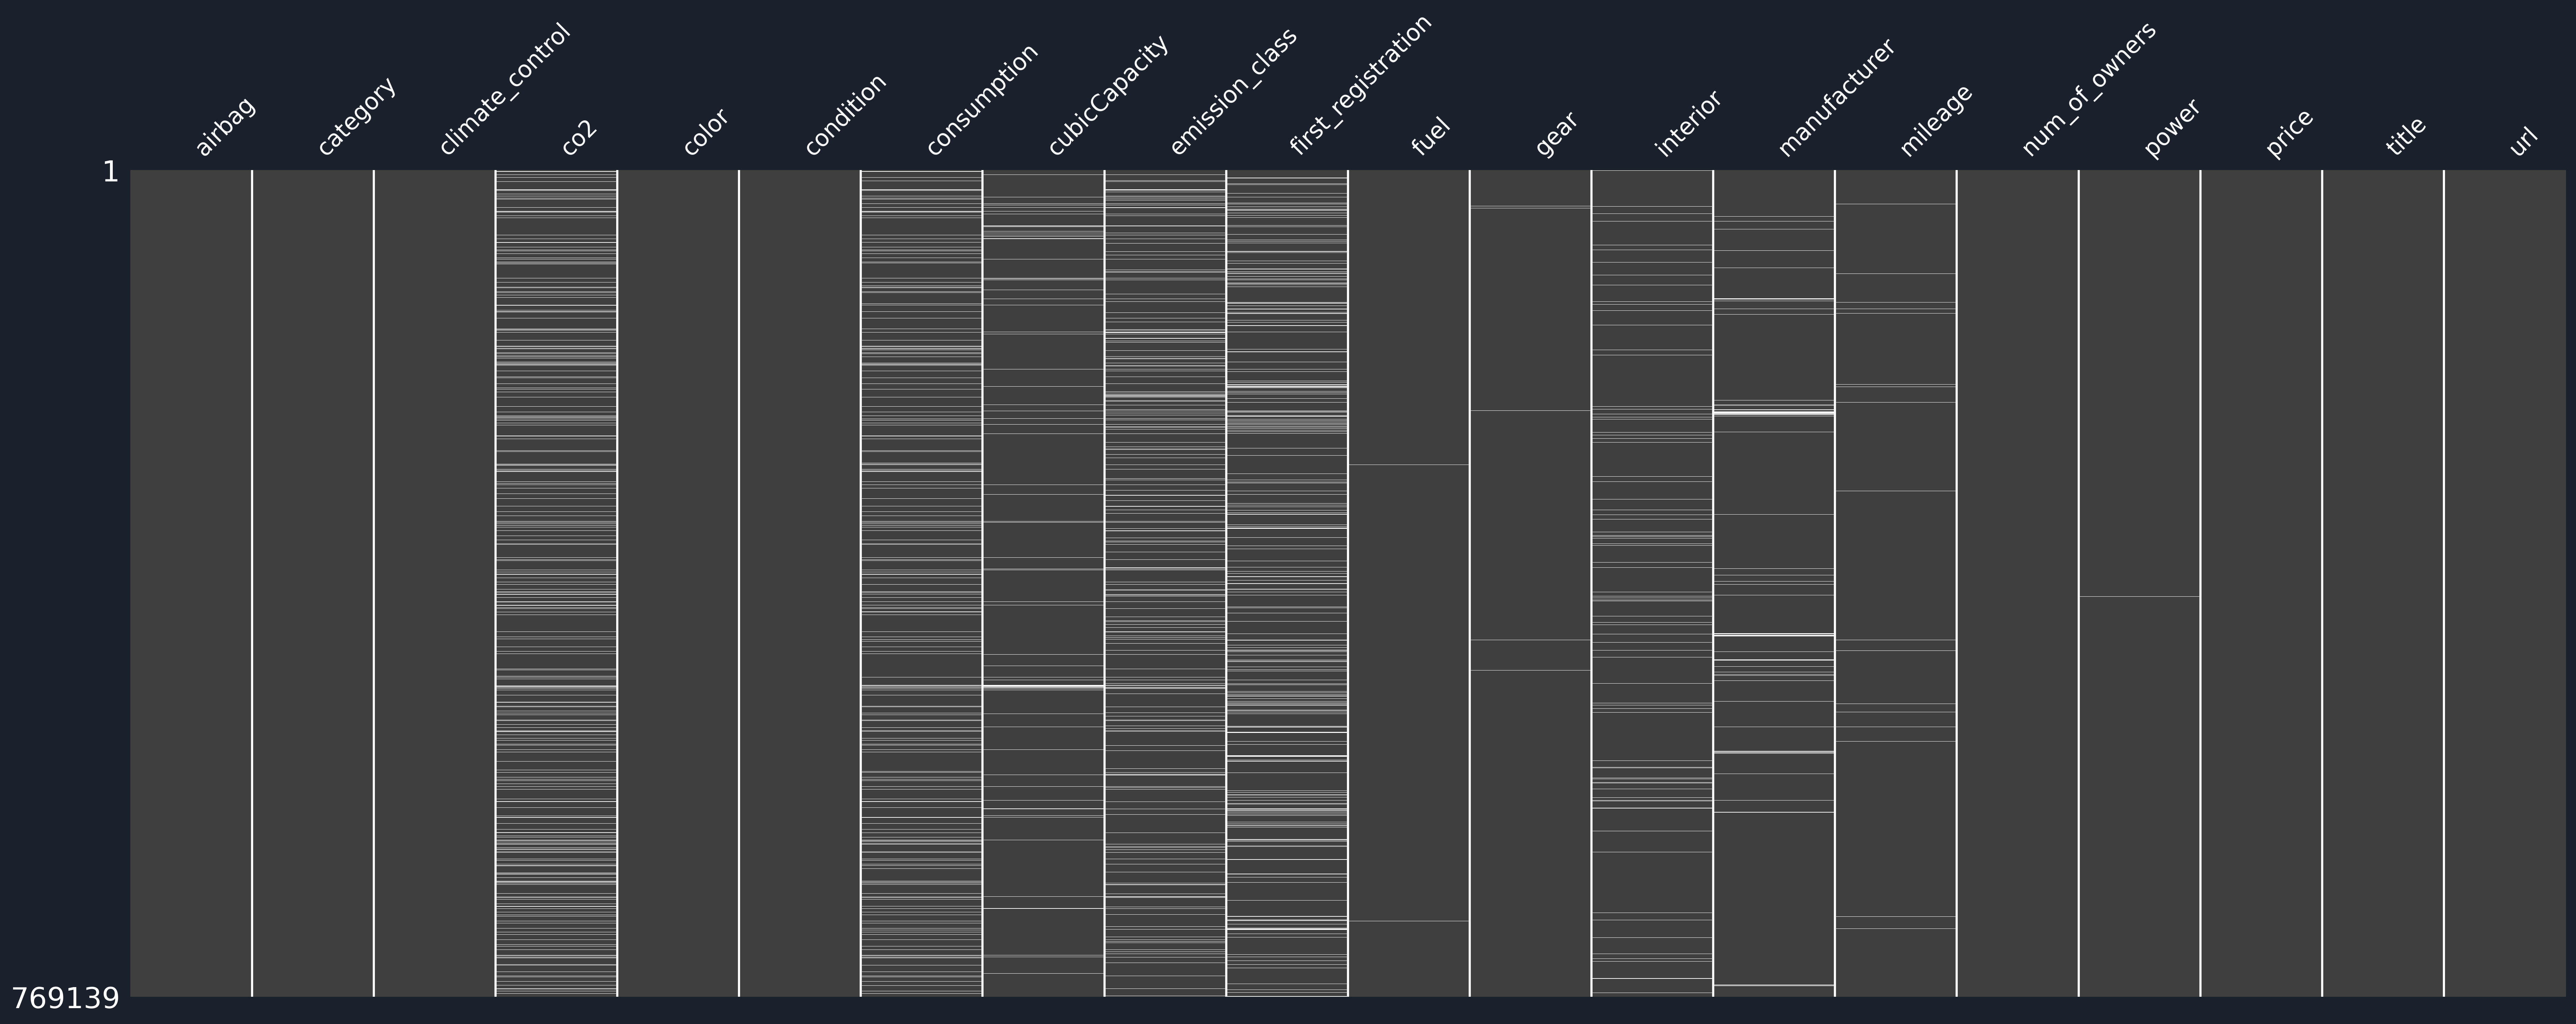

In [12]:
cars['condition'] = cars['condition'].replace('damaged, accident-damaged vehicle, not roadworthy', 'beschädigt, unfallfahrzeug, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('damaged', 'beschädigt')
cars['condition'] = cars['condition'].replace('damaged, accident-damaged vehicle', 'beschädigt, unfallfahrzeug')
cars['condition'] = cars['condition'].replace('damaged, not roadworthy', 'beschädigt, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('accident-free, not roadworthy', 'unfallfrei, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('damaged, accident-free, not roadworthy', 'beschädigt, unfallfrei, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('repaired accident damage', 'reparierter unfallschaden')
cars['condition'] = cars['condition'].replace('repaired accident damage, not roadworthy', 'reparierter unfallschaden, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('damaged, accident-free', 'beschädigt, unfallfrei')
cars['condition'] = cars['condition'].replace('accident-free', 'unfallfrei')
cars['condition'] = cars['condition'].replace('not roadworthy', 'nicht fahrtauglich')
cars['condition'] = cars['condition'].fillna('unfallfrei')

matrix(cars)

#### fuel

['hybrid' 'benzin' 'diesel' 'autogas' 'andere' 'erdgas']


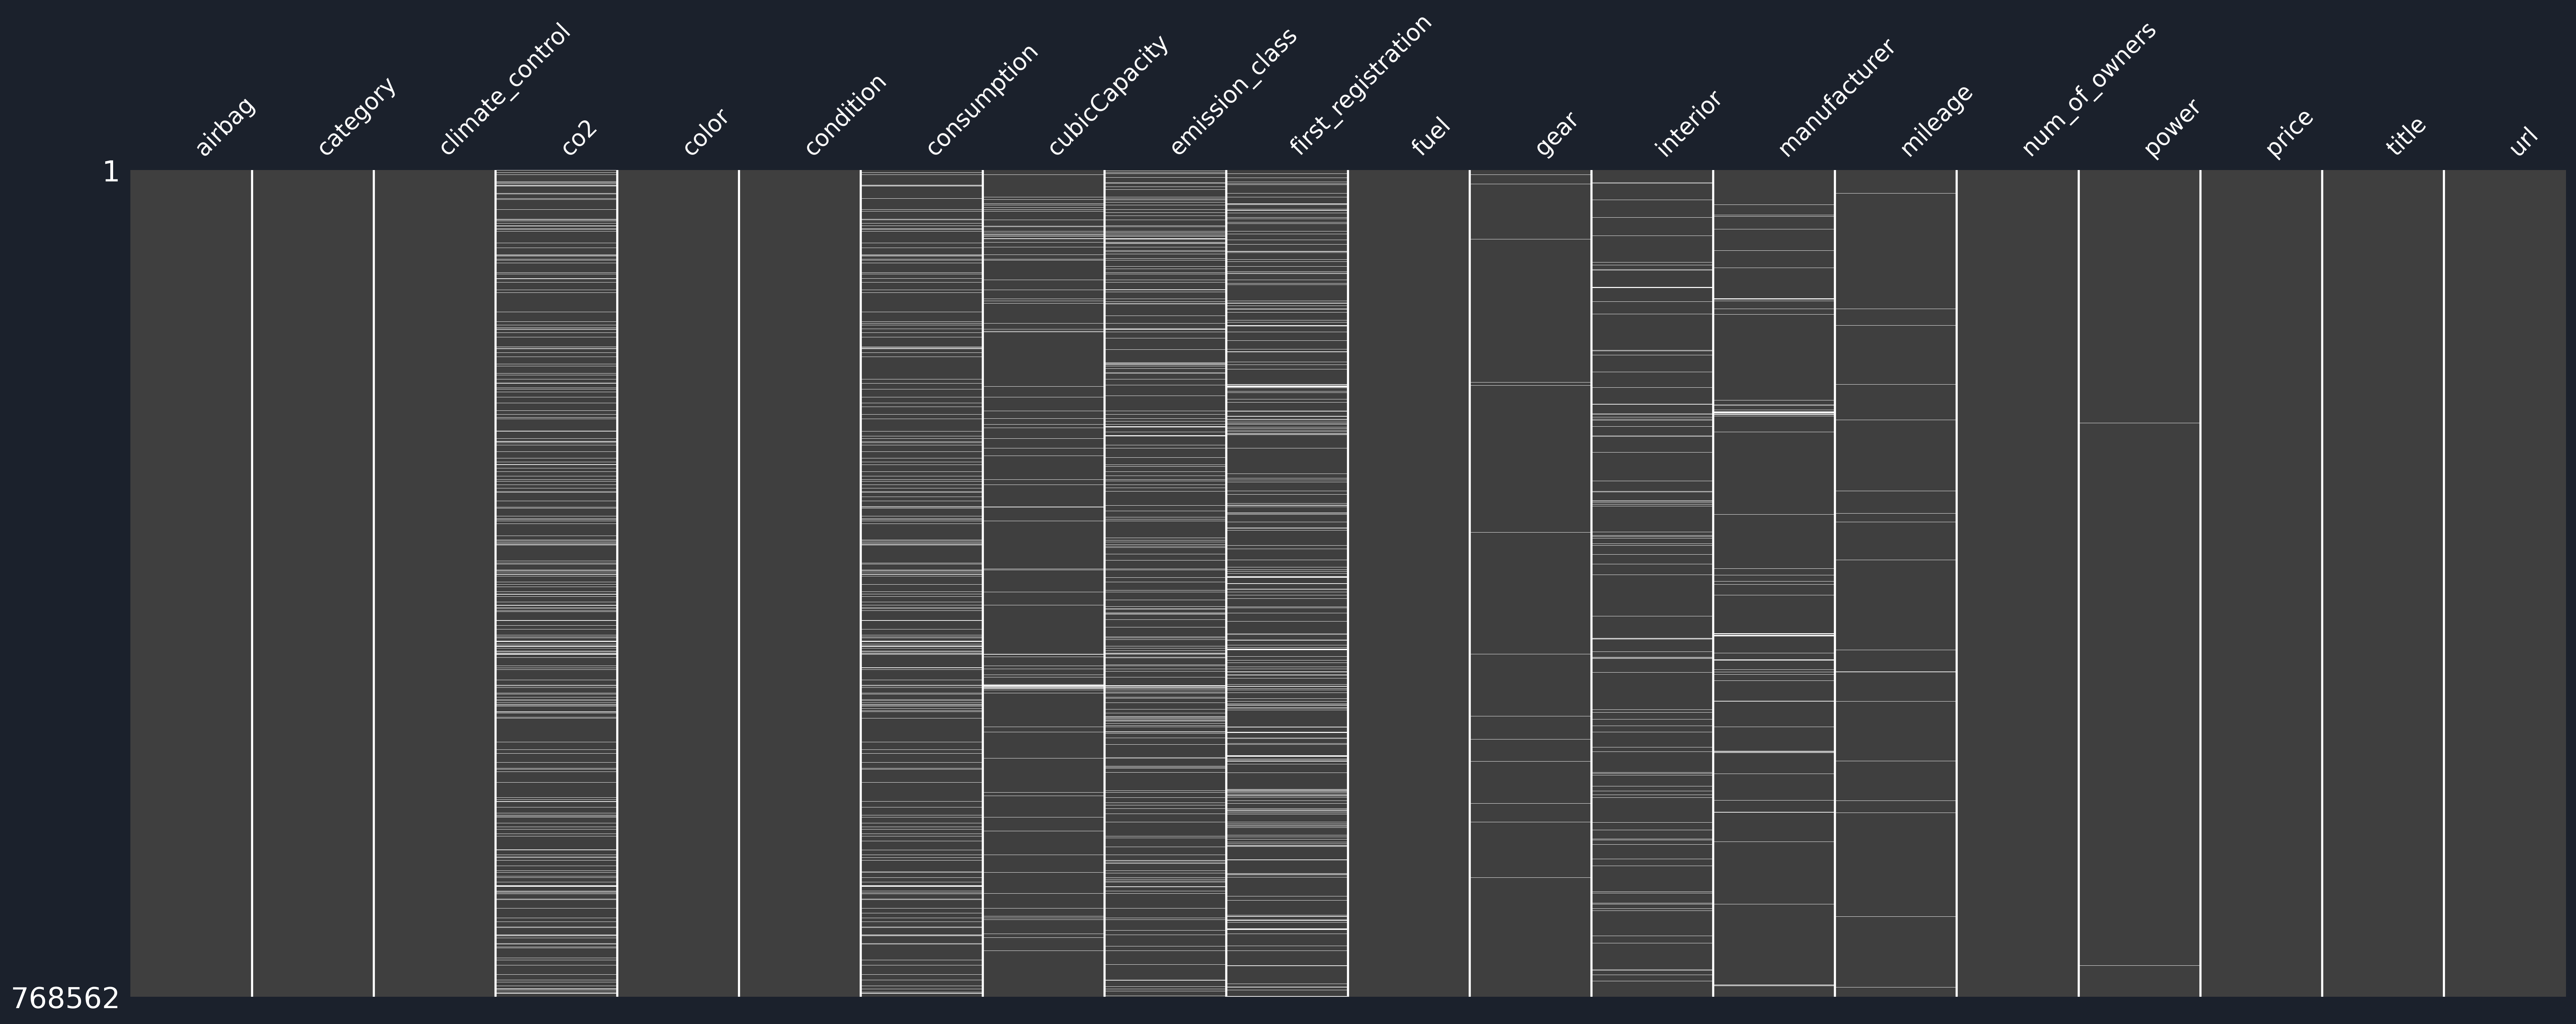

In [13]:
fuels = ["hybrid", "benzin", "diesel", "erdgas", "autogas"]
cars = cars[cars['fuel'].notnull()]

for fuel in fuels:
    cars['fuel'] = cars['fuel'].apply(lambda x: fuel if fuel in str(x).lower() else x)

fuel_dict = {"petrol": "benzin"}
for key in fuel_dict:
    cars['fuel'] = cars['fuel'].apply(lambda x: fuel_dict[key] if key in str(x).lower() else x)

cars.loc[~cars["fuel"].isin(fuels), "fuel"] = "andere"

print(cars['fuel'].unique())

matrix(cars)

#### gear

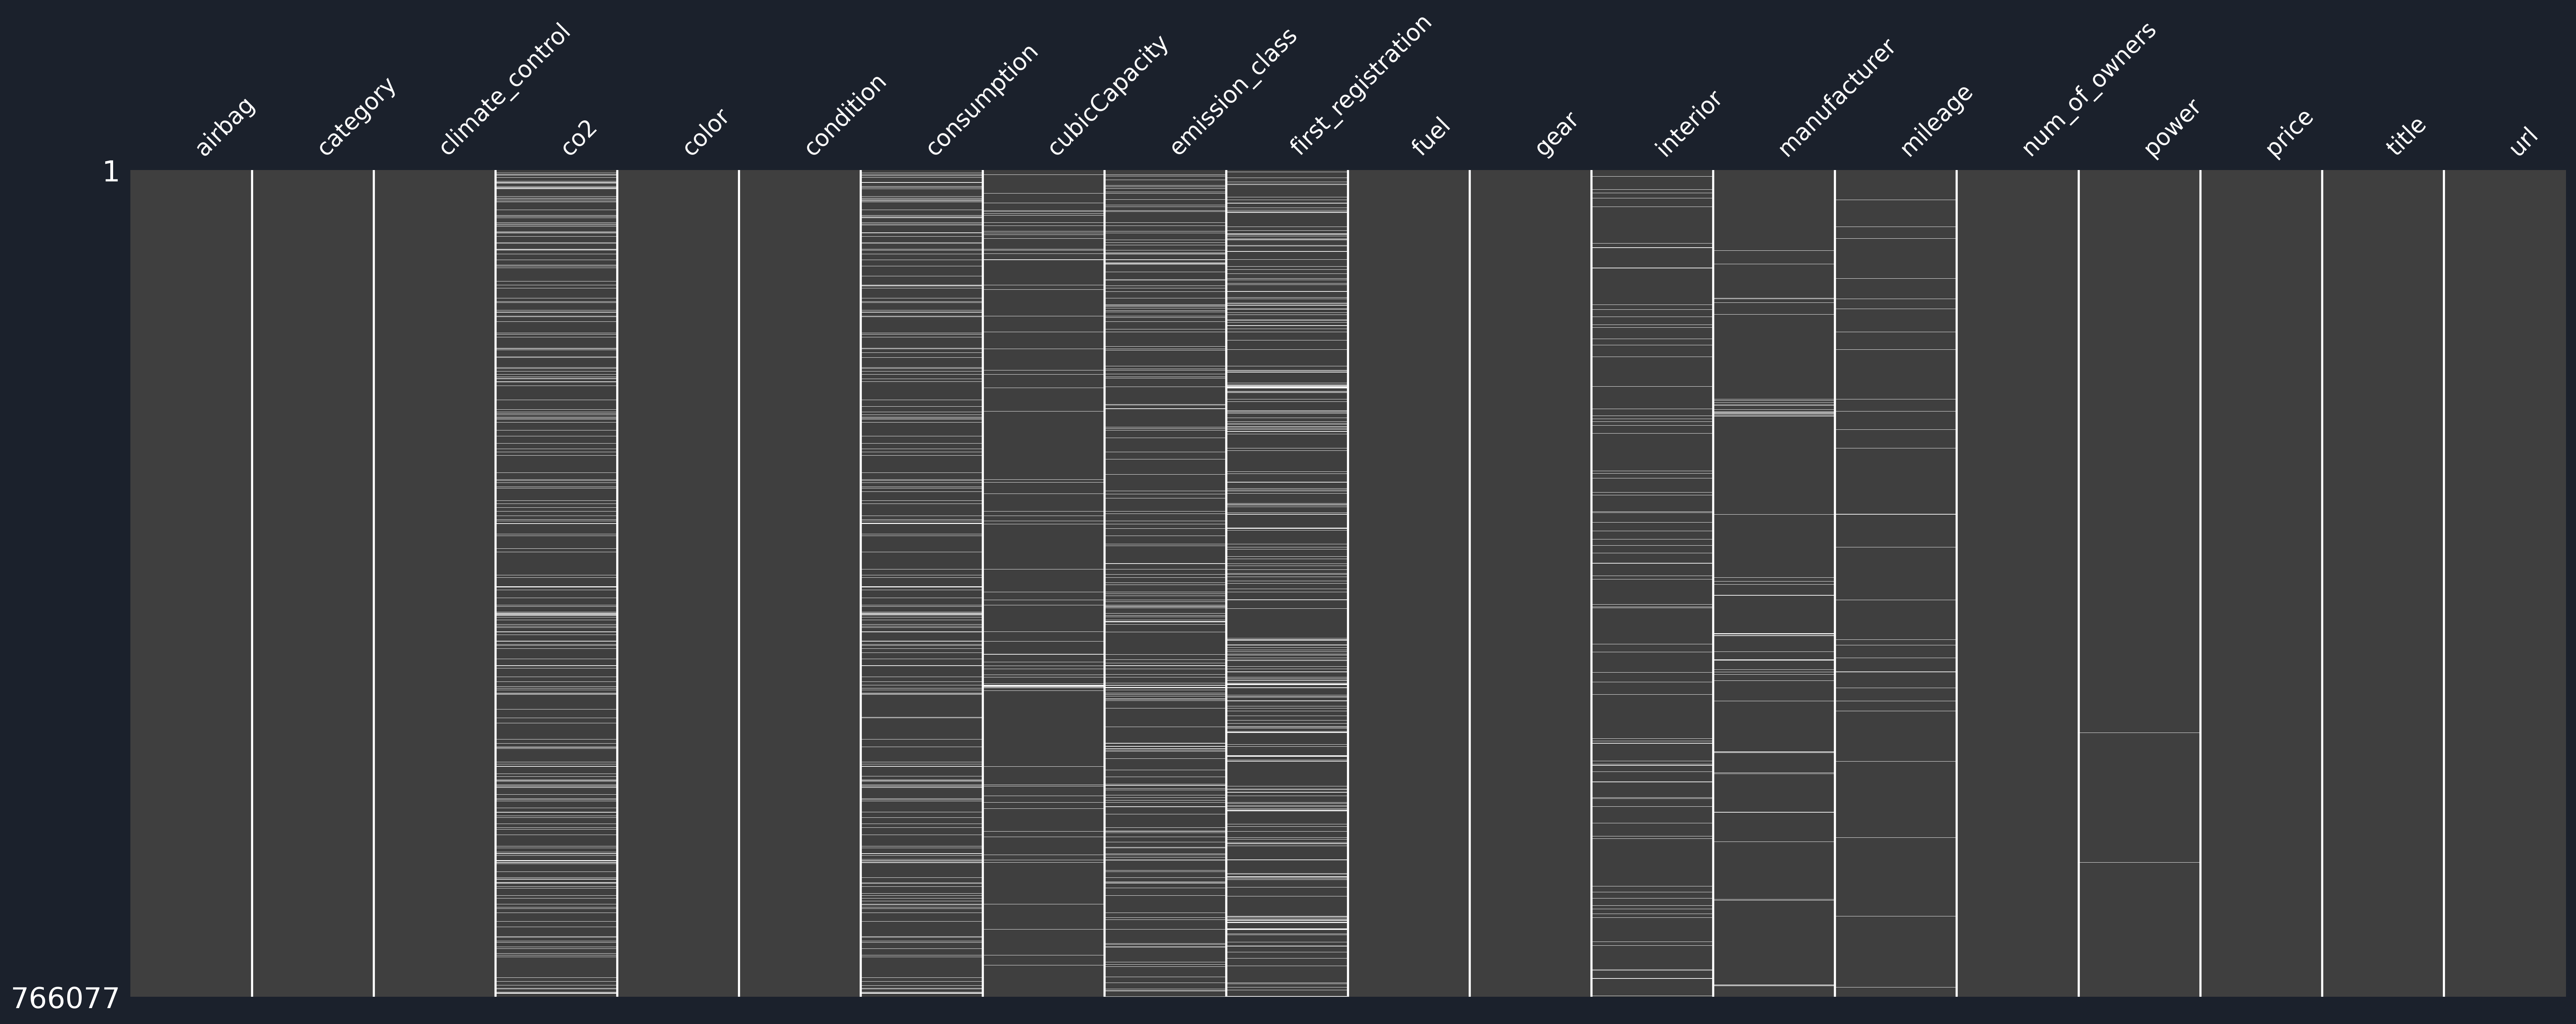

In [14]:
cars = cars[cars['gear'].notnull()]
gear_dict = {"manual gearbox": "schaltgetriebe", "automatic transmission":"automatik"}
for key in gear_dict:
    cars['gear'] = cars['gear'].apply(lambda x: gear_dict[key] if key in str(x).lower() else x)

matrix(cars)

#### interior

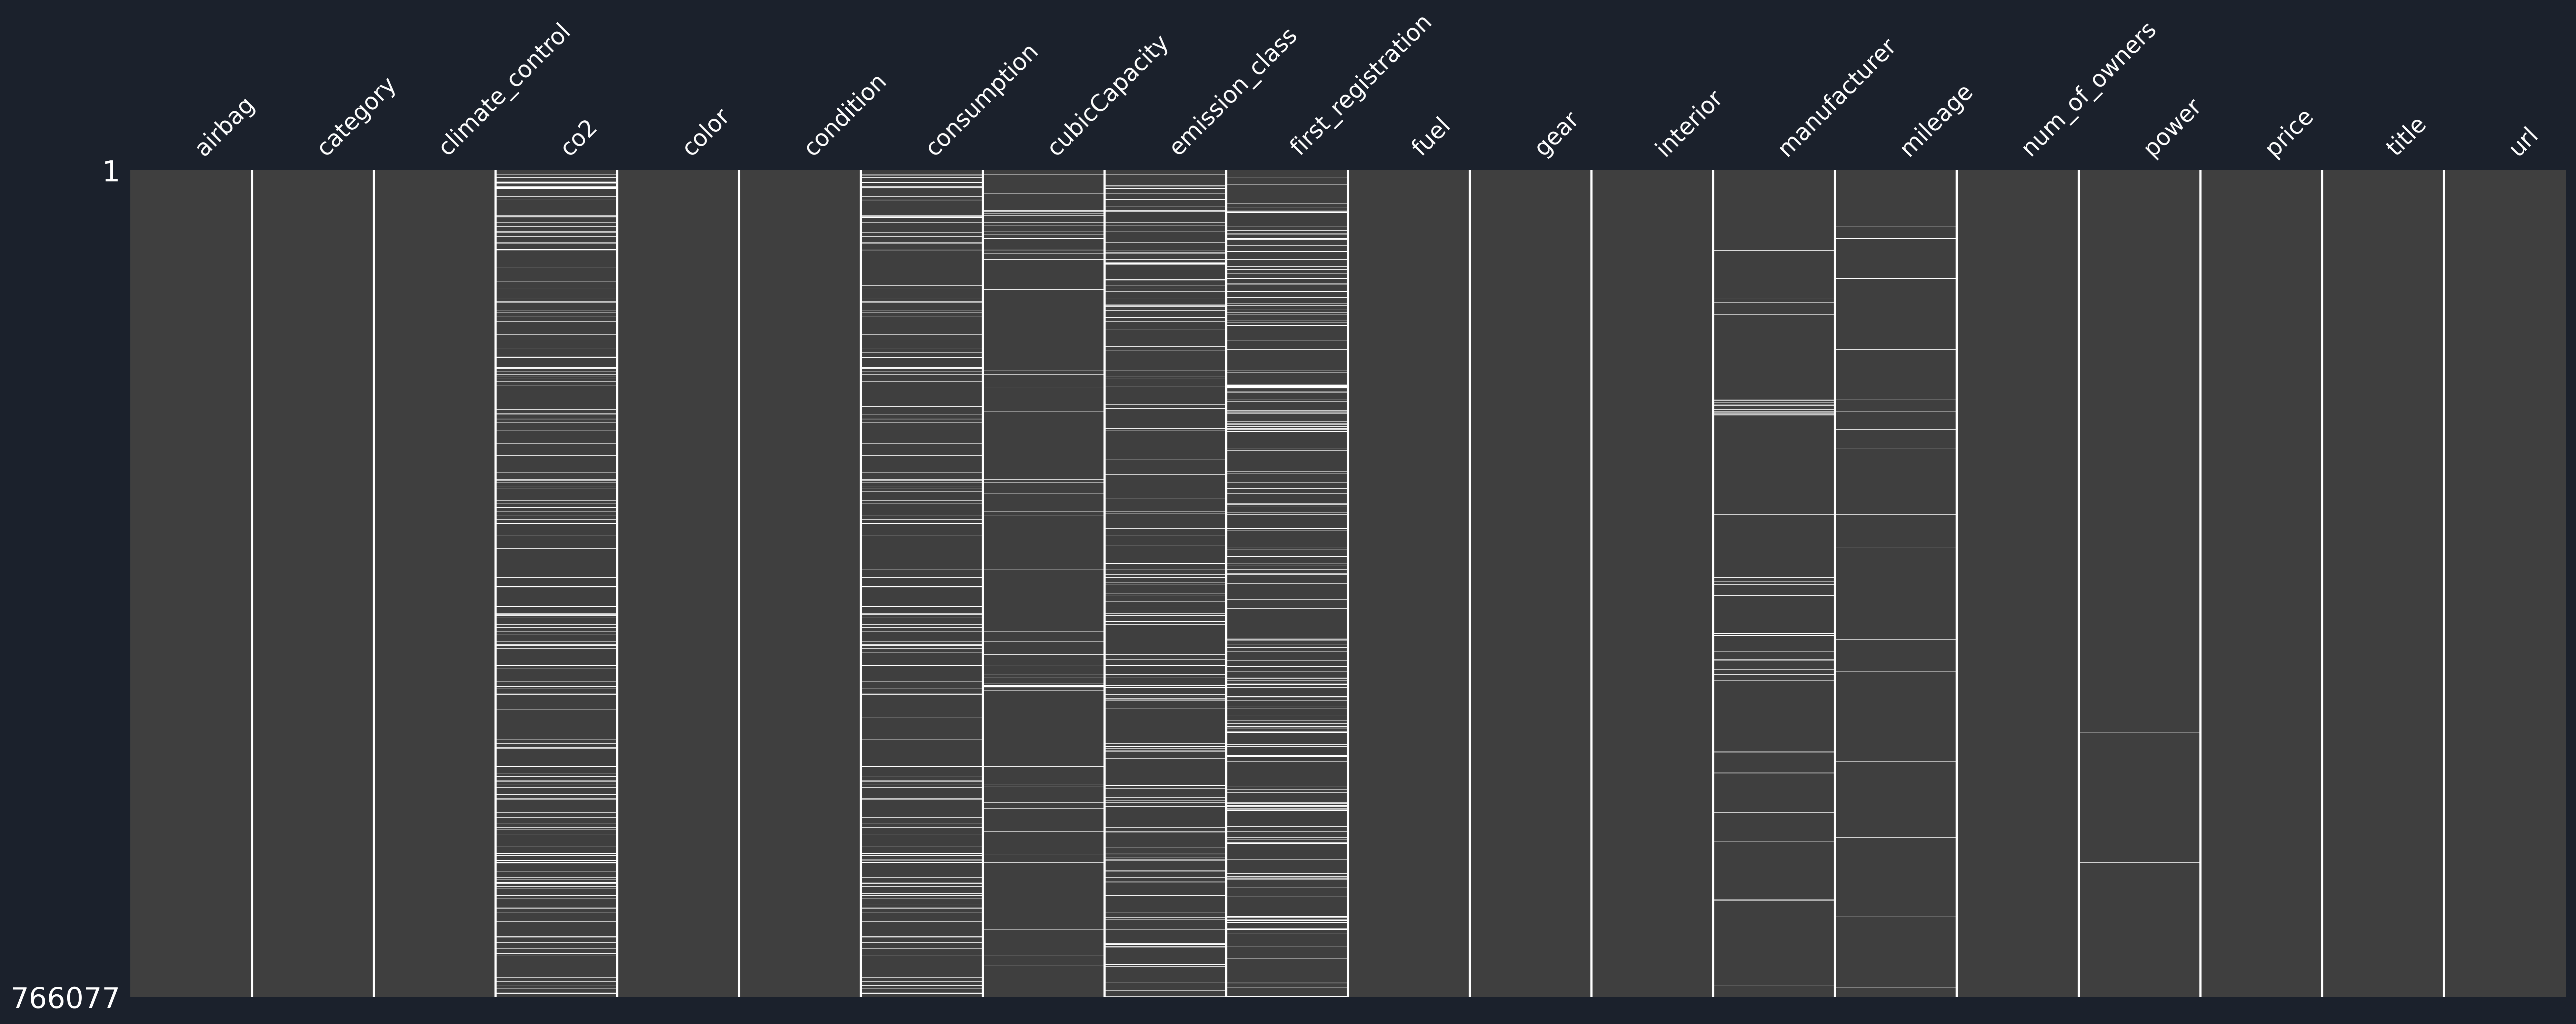

In [15]:
interior_list = ["vollleder", "teilleder", "stoff",
                 "andere", "alcantara", "velours",
                 "cloth"]

interior_dict = {"full leather": "vollleder", "part leather": "teilleder",
                 "other": "andere", "velours": "velours", "velour": "velours",
                 "cloth": "stoff"}

for key in interior_dict:
    cars['interior'] = cars['interior'].apply(lambda x: interior_dict[key] if key in str(x).lower() else x)

for interior in interior_list:
    cars['interior'] = cars['interior'].apply(lambda x: interior if interior in str(x).lower() else x)

cars.loc[~cars["interior"].isin(interior_list), "interior"] = "andere"

matrix(cars)

##### category

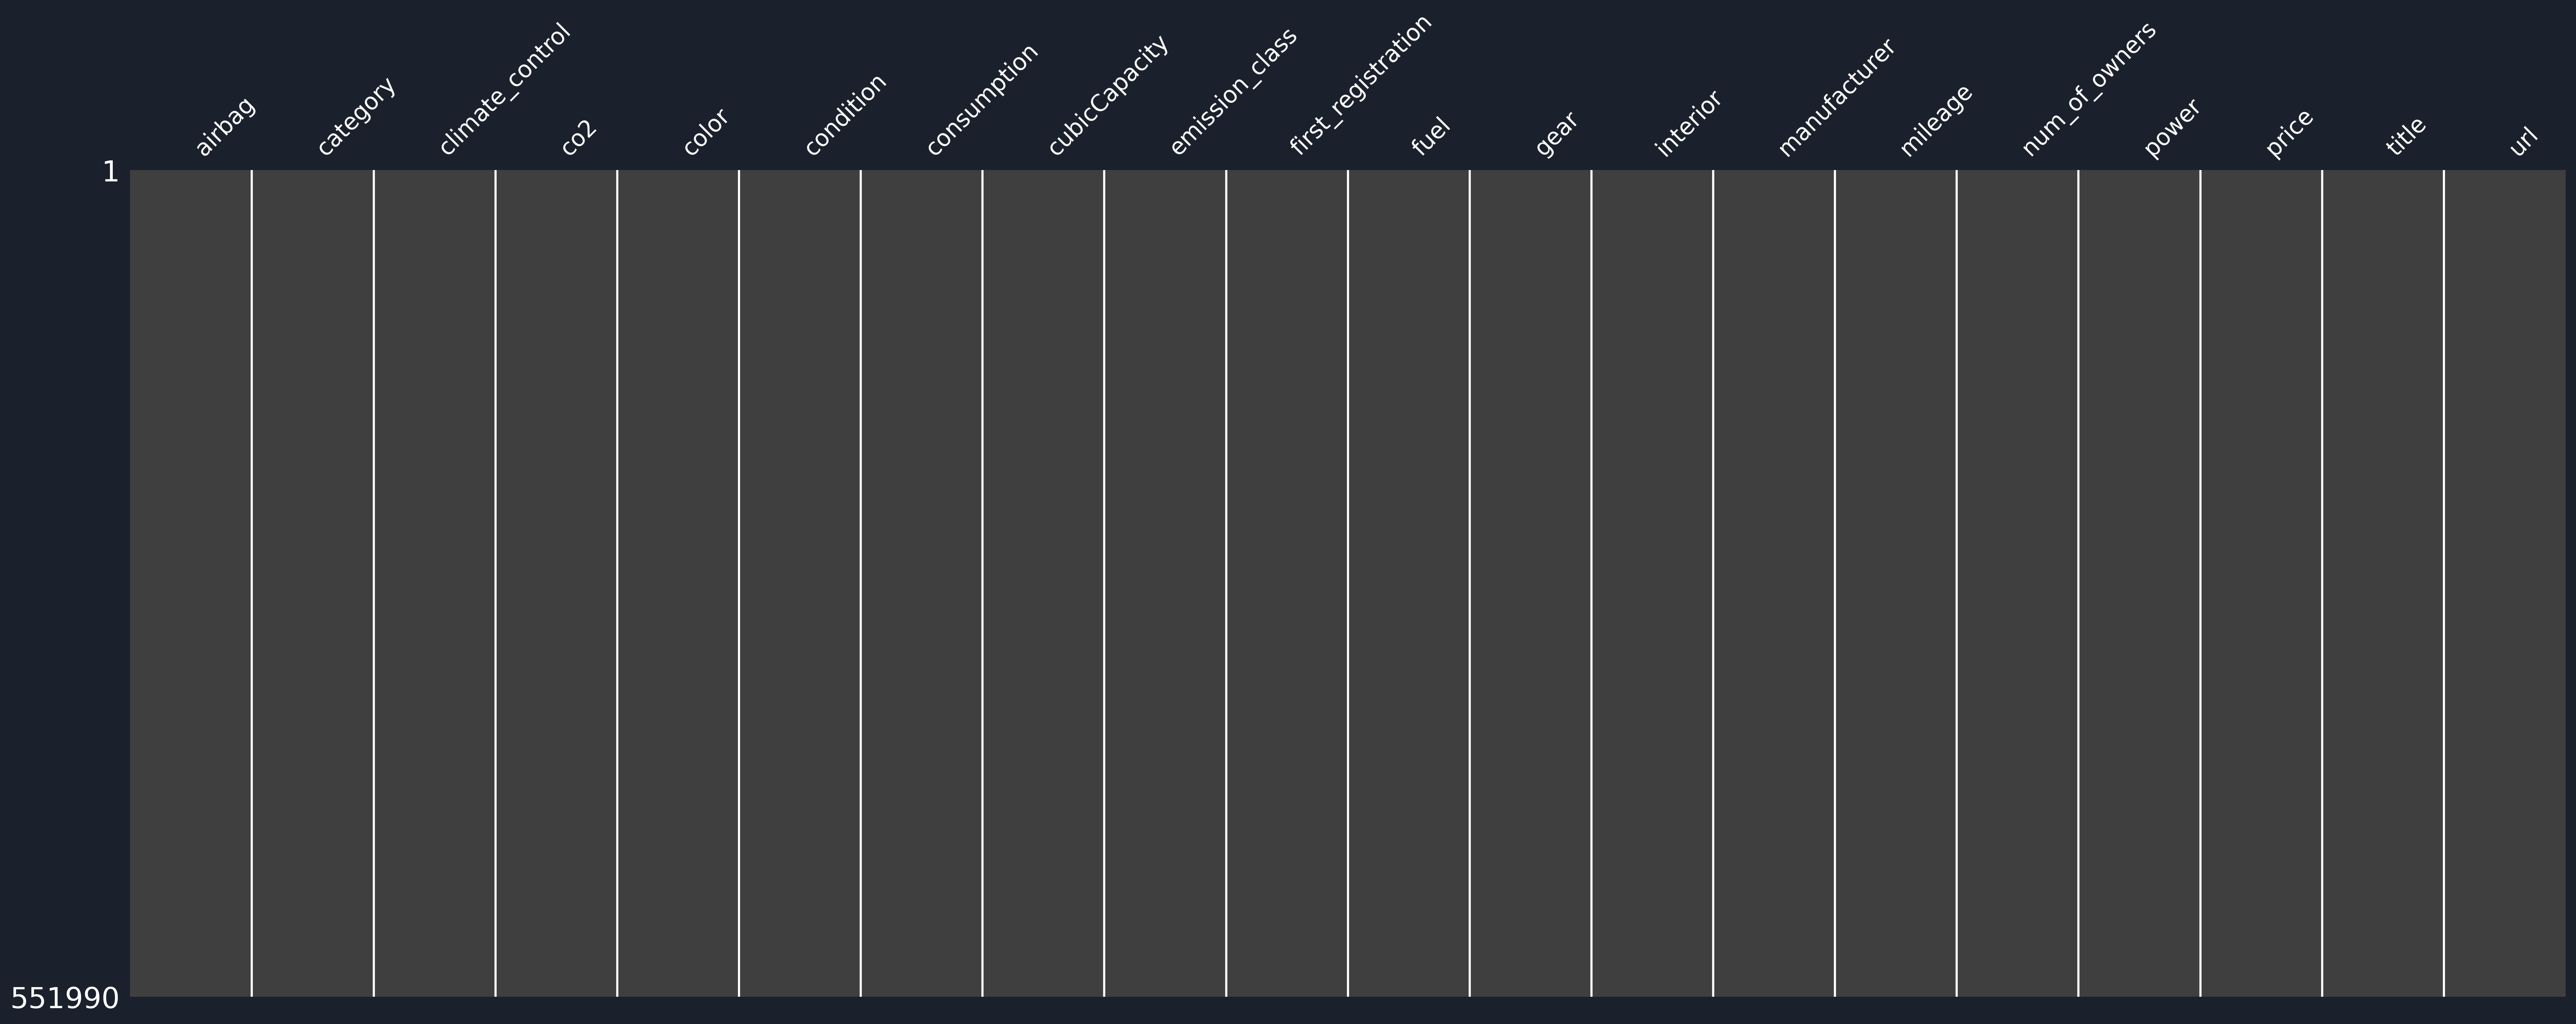

In [16]:
cars = cars[cars['co2'].notnull()]
cars = cars[cars['consumption'].notnull()]
cars = cars[cars['cubicCapacity'].notnull()]
cars = cars[cars['emission_class'].notnull()]
cars = cars[cars['first_registration'].notnull()]
cars = cars[cars['gear'].notnull()]
cars = cars[cars['manufacturer'].notnull()]

matrix(cars)

#### first registration

In [17]:
cars['first_registration'] = pd.to_datetime(cars['first_registration'])
cars['first_registration'] = cars['first_registration'].dt.year

matrix(cars)

#### car type

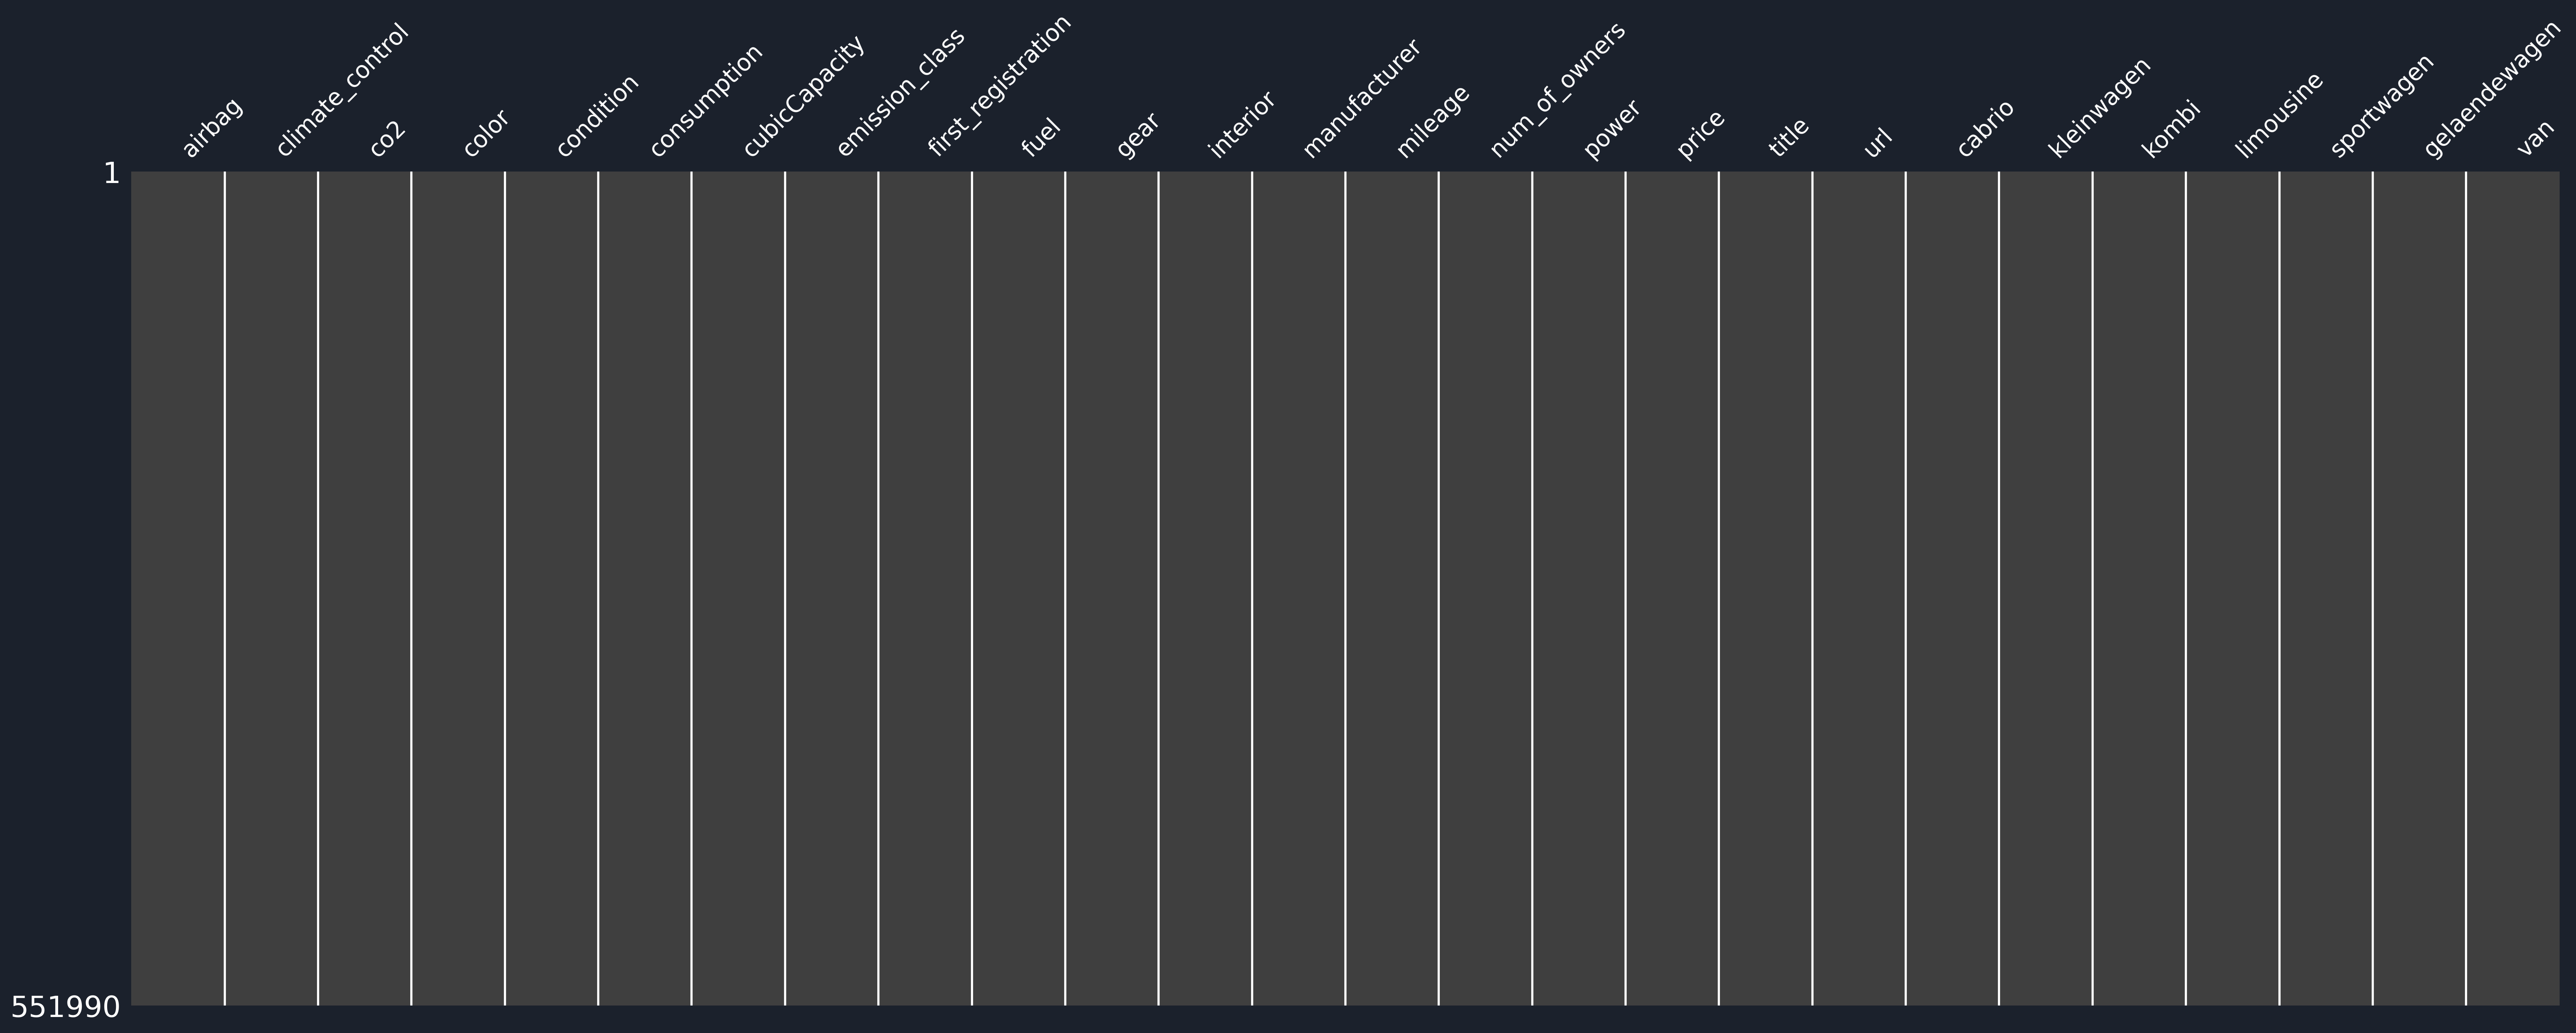

In [18]:
for cat in ['cabrio', "roadster", "cabriolet"]:
    cars.loc[cars.category.str.contains(cat), 'cabrio'] = 1
cars.cabrio = cars.cabrio.fillna(0)

for cat in ['kleinwagen', "small car"]:
    cars.loc[cars.category.str.contains(cat), 'kleinwagen'] = 1
cars.kleinwagen = cars.kleinwagen.fillna(0)

for cat in ['kombi', "estate car"]:
    cars.loc[cars.category.str.contains(cat), 'kombi'] = 1
cars.kombi = cars.kombi.fillna(0)

for cat in ["limousine", "saloon"]:
    cars.loc[cars.category.str.contains(cat), 'limousine'] = 1
cars.limousine = cars.limousine.fillna(0)

for cat in ['sportwagen', "coupé", "sports car"]:
    cars.loc[cars.category.str.contains(cat), 'sportwagen'] = 1
cars.sportwagen = cars.sportwagen.fillna(0)

for cat in ['geländewagen', "pickup", "suv", "off-road"]:
    cars.loc[cars.category.str.contains(cat), 'gelaendewagen'] = 1
cars.gelaendewagen = cars.gelaendewagen.fillna(0)

for cat in ['van', "minibus"]:
    cars.loc[cars.category.str.contains(cat), 'van'] = 1
cars.van = cars.van.fillna(0)

cars = cars.drop(columns=['category'])

matrix(cars)

#### drop all NaN

In [1]:
cars = cars.dropna()
matrix(cars)

NameError: name 'cars' is not defined

#### convert datatypes

In [22]:
cars = cars.astype({"co2": "float64", "consumption": "float64", "cubicCapacity": "float64",
                    "emission_class": "float64","mileage": "float64", "power": "float64",
                    "price": "float64","cabrio": "float64", "kleinwagen": "float64",
                    "kombi": "float64", "limousine": "float64", "sportwagen": "float64",
                    "gelaendewagen": "float64", "van": "float64"})

cars = cars.astype({"cabrio": "int", "kleinwagen": "int", "kombi": "int", "limousine": "int",
                    "sportwagen": "int", "gelaendewagen": "int", "van": "int"})
print(cars.dtypes)

airbag                 object
climate_control        object
co2                   float64
color                  object
condition              object
consumption           float64
cubicCapacity         float64
emission_class        float64
first_registration      int64
fuel                   object
gear                   object
interior               object
manufacturer           object
mileage               float64
num_of_owners           int32
power                 float64
price                 float64
title                  object
url                    object
cabrio                  int32
kleinwagen              int32
kombi                   int32
limousine               int32
sportwagen              int32
gelaendewagen           int32
van                     int32
dtype: object


#### outlier removal

In [23]:
import numpy as np

cars = cars[cars['price'] < 1000000]

numeric_cols = cars.select_dtypes(include=np.number).columns

for col in numeric_cols:
    if cars[col].nunique() < 5:
        continue
    diff_q = np.quantile(cars[col], [0.005, 0.995])
    diff_q[0] = diff_q[0] - (diff_q[0] * 0.05)
    diff_q[1] = diff_q[1] + (diff_q[1] * 0.05)
    cars = cars[(cars[col] > diff_q[0]) & (cars[col] < diff_q[1])]

cars.shape

Index(['co2', 'consumption', 'cubicCapacity', 'emission_class',
       'first_registration', 'mileage', 'num_of_owners', 'power', 'price',
       'cabrio', 'kleinwagen', 'kombi', 'limousine', 'sportwagen',
       'gelaendewagen', 'van'],
      dtype='object')
(529150, 26)


#### duplicates removal

In [24]:
cars = cars.drop_duplicates(subset=cars.drop(columns=['url', 'title']).columns)
matrix(cars)

#### saving the dataset

In [ ]:
cars.to_csv('../resources/cars_clean.csv', index=False)
